In [20]:
import pandas as pd

In [12]:
df = pd.read_csv("/content/insurance.csv")

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# 1. Import libraries
import pandas as pd
import numpy as np

# 2. Load the CSV (upload manually in Colab with the upload widget)
from google.colab import files
uploaded = files.upload()

# 3. Read the uploaded file
df = pd.read_csv('insurance.csv')

# 4. Basic cleaning: lowercase columns, strip strings
df.columns = df.columns.str.strip().str.lower()
df['sex'] = df['sex'].str.strip().str.lower()
df['smoker'] = df['smoker'].str.strip().str.lower()
df['region'] = df['region'].str.strip().str.lower()

# 5. Check and drop duplicates if any
df.drop_duplicates(inplace=True)

# 6. Handle outliers (optional - simple BMI filter example)
# Remove rows where BMI is extremely high or low
df = df[(df['bmi'] > 10) & (df['bmi'] < 60)]

# 7. Encode categorical columns (if needed for ML)
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# 8. Final check
print(df_encoded.info())
df_encoded.head()








<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_male          1337 non-null   bool   
 5   smoker_yes        1337 non-null   bool   
 6   region_northwest  1337 non-null   bool   
 7   region_southeast  1337 non-null   bool   
 8   region_southwest  1337 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 58.8 KB
None


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


/tmp/ipython-input-15-898754158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=df, estimator='mean', palette='Set2')


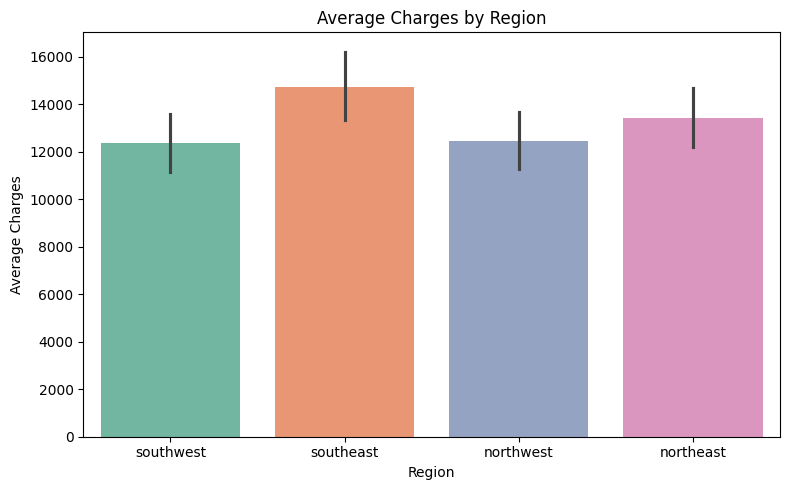

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='region', y='charges', data=df, estimator='mean', palette='Set2')
plt.title("Average Charges by Region")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.tight_layout()
plt.show()

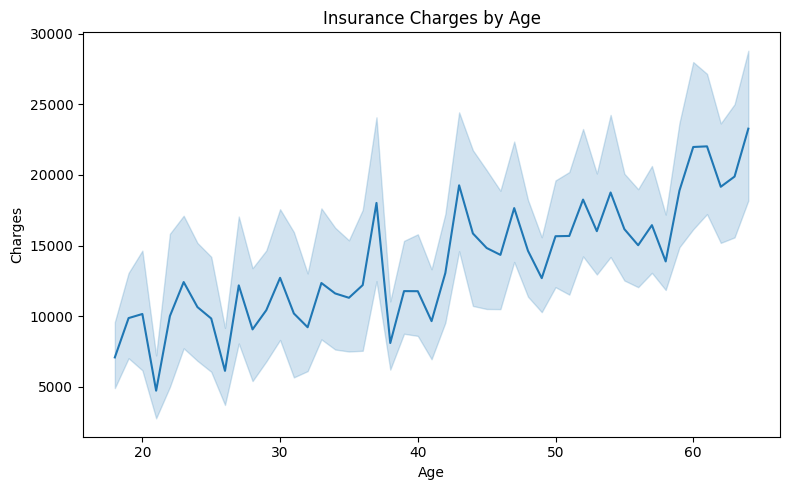

In [16]:
plt.figure(figsize=(8,5))
sns.lineplot(x='age', y='charges', data=df.sort_values(by='age'))
plt.title("Insurance Charges by Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.tight_layout()
plt.show()

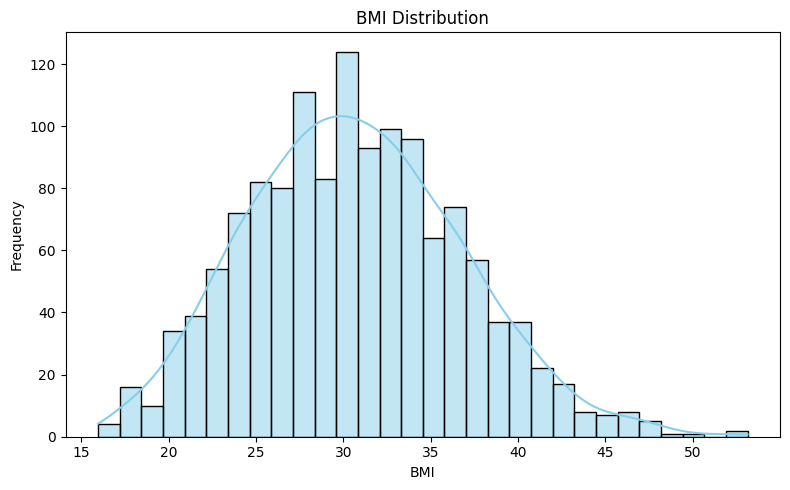

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['bmi'], bins=30, kde=True, color='skyblue')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

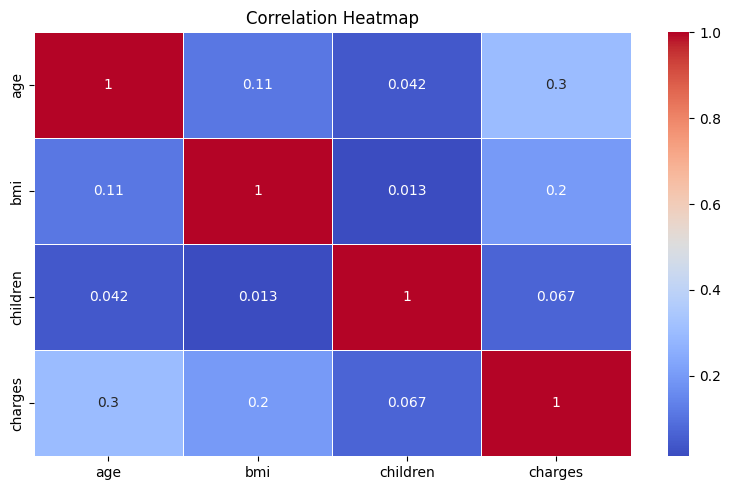

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

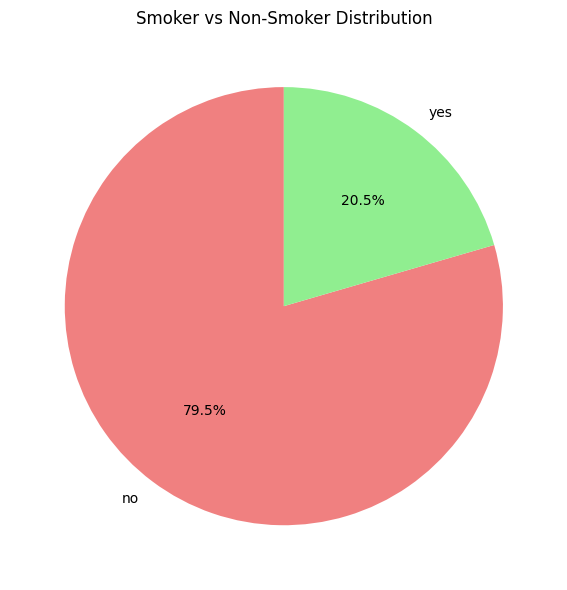

In [19]:
plt.figure(figsize=(6,6))
df['smoker'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title("Smoker vs Non-Smoker Distribution")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()